In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2023/Probability':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2023/Probability')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_85742/35548043.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.

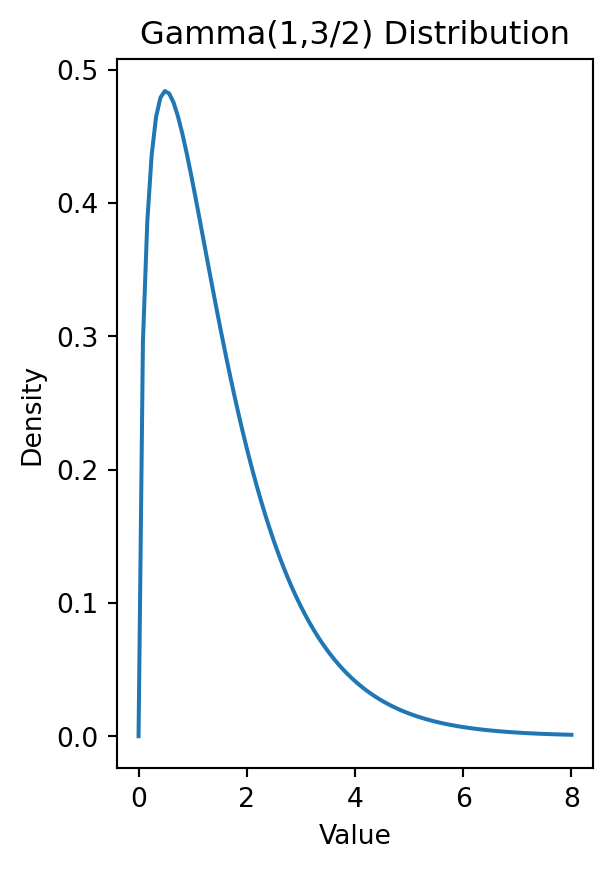

In [2]:
#| code-fold: true
#| code-summary: "コードを表示"
#| fig-align: center
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

nu = 1.5  # 形状パラメーター

# Gamma分布のPDFをグリッド上で計算
x = np.linspace(0, 8, 100)
pdf = gamma.pdf(x, nu)

# プロットの実行
plt.figure(figsize=(3.2, 4.8)) # スマホサイズに合わせる
plt.plot(x, pdf)
plt.title('Gamma(1,3/2) Distribution')
plt.ylabel('Density')
plt.xlabel('Value')
plt.show()

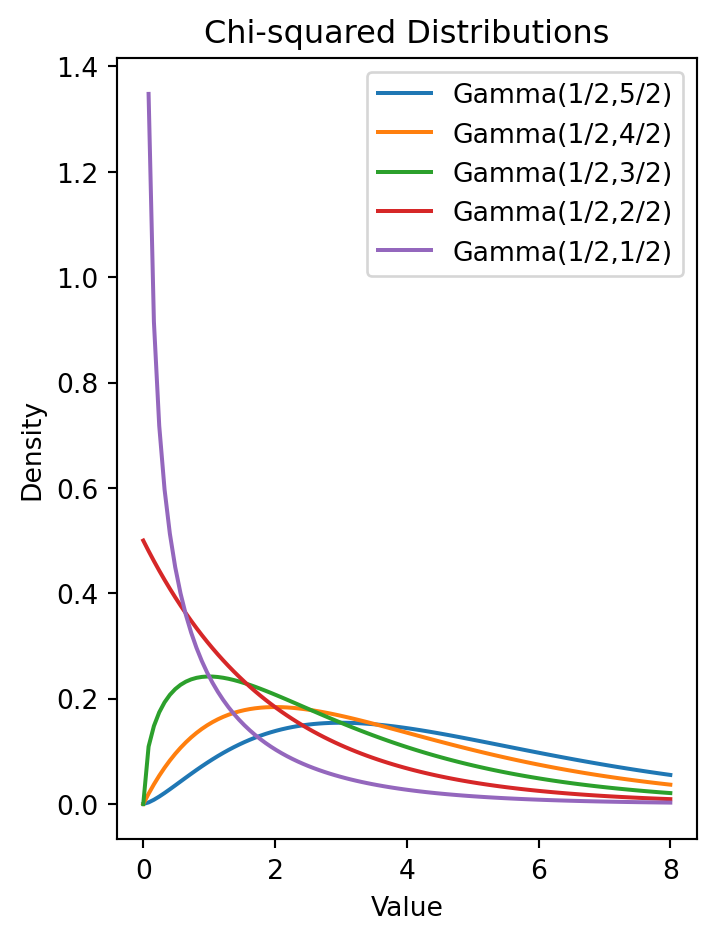

In [3]:
#| echo: false
#| fig-align: center

# xの範囲を定義
x = np.linspace(0, 8, 100)

plt.subplot(1, 2, 1)

pdf5 = gamma.pdf(x, 2.5, scale=2)
plt.plot(x, pdf5, label='Gamma(1/2,5/2)')

pdf4 = gamma.pdf(x, 2.0, scale=2)
plt.plot(x, pdf4, label='Gamma(1/2,4/2)')

pdf3 = gamma.pdf(x, 1.5, scale=2)
plt.plot(x, pdf3, label='Gamma(1/2,3/2)')

# Gamma分布1のプロット（形状パラメータが2.0）
pdf1 = gamma.pdf(x, 1.0, scale=2)
plt.plot(x, pdf1, label='Gamma(1/2,2/2)')

# Gamma分布2のプロット（形状パラメータが3.0）
pdf2 = gamma.pdf(x, 0.5, scale=2)
plt.plot(x, pdf2, label='Gamma(1/2,1/2)')

# プロットのカスタマイズ
plt.title('Chi-squared Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

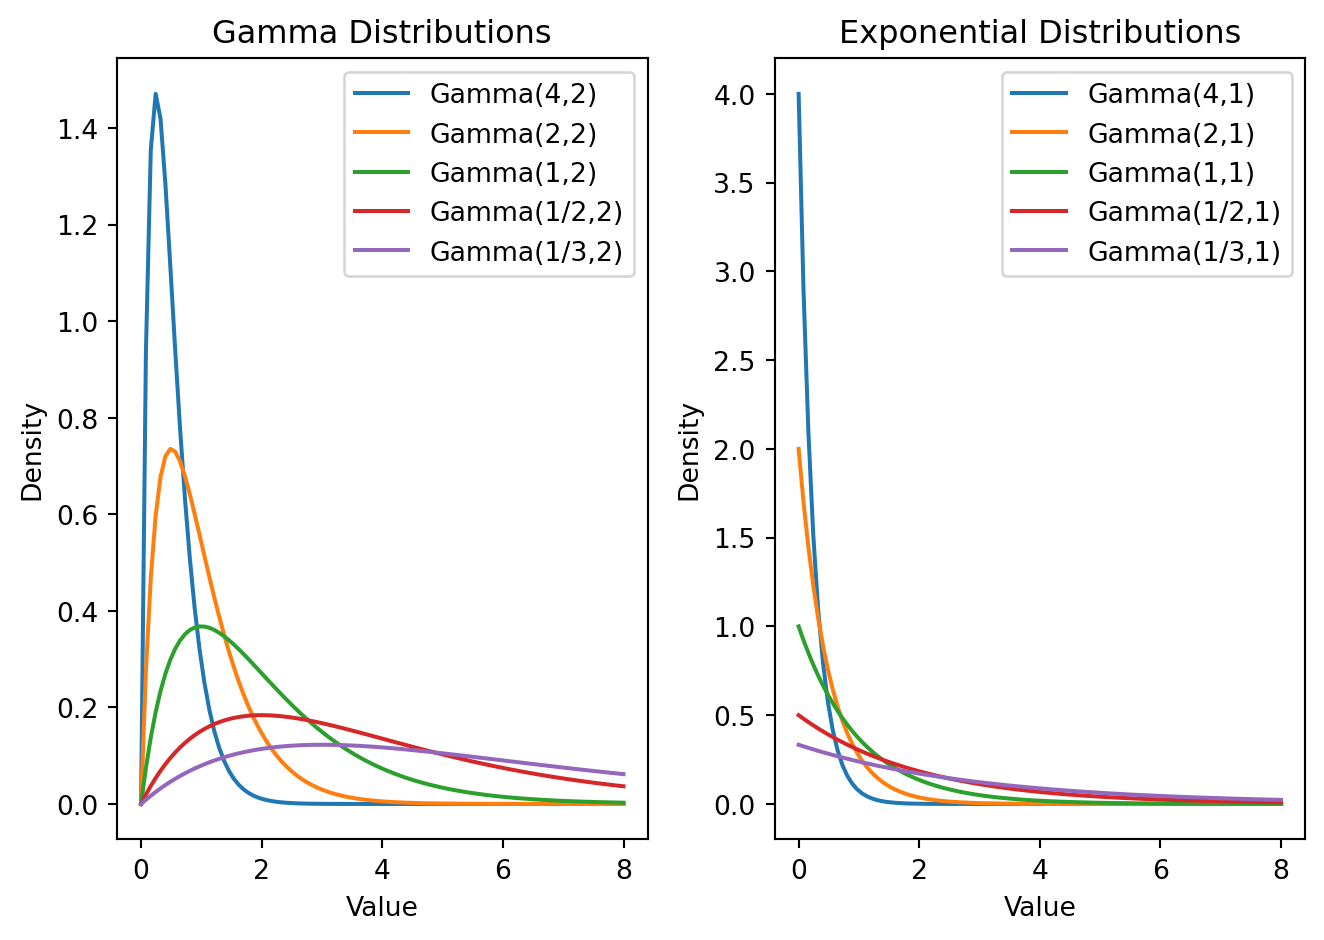

In [4]:
#| echo: false
#| fig-align: center
x = np.linspace(0, 8, 100)

plt.subplot(1, 2, 1)

pdf1 = gamma.pdf(x, 2.0, scale=0.25)
plt.plot(x, pdf1, label='Gamma(4,2)')

pdf2 = gamma.pdf(x, 2.0, scale=0.5)
plt.plot(x, pdf2, label='Gamma(2,2)')

pdf5 = gamma.pdf(x, 2.0, scale=1)
plt.plot(x, pdf5, label='Gamma(1,2)')

pdf4 = gamma.pdf(x, 2.0, scale=2)
plt.plot(x, pdf4, label='Gamma(1/2,2)')

pdf3 = gamma.pdf(x, 2.0, scale=3)
plt.plot(x, pdf3, label='Gamma(1/3,2)')

plt.title('Gamma Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

## 右側
plt.subplot(1, 2, 2)

pdf1 = gamma.pdf(x, 1.0, scale=0.25)
plt.plot(x, pdf1, label='Gamma(4,1)')

pdf2 = gamma.pdf(x, 1.0, scale=0.5)
plt.plot(x, pdf2, label='Gamma(2,1)')

pdf5 = gamma.pdf(x, 1.0, scale=1)
plt.plot(x, pdf5, label='Gamma(1,1)')

pdf4 = gamma.pdf(x, 1.0, scale=2)
plt.plot(x, pdf4, label='Gamma(1/2,1)')

pdf3 = gamma.pdf(x, 1.0, scale=3)
plt.plot(x, pdf3, label='Gamma(1/3,1)')

plt.title('Exponential Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# プロットのカスタマイズ
plt.tight_layout()
plt.show()

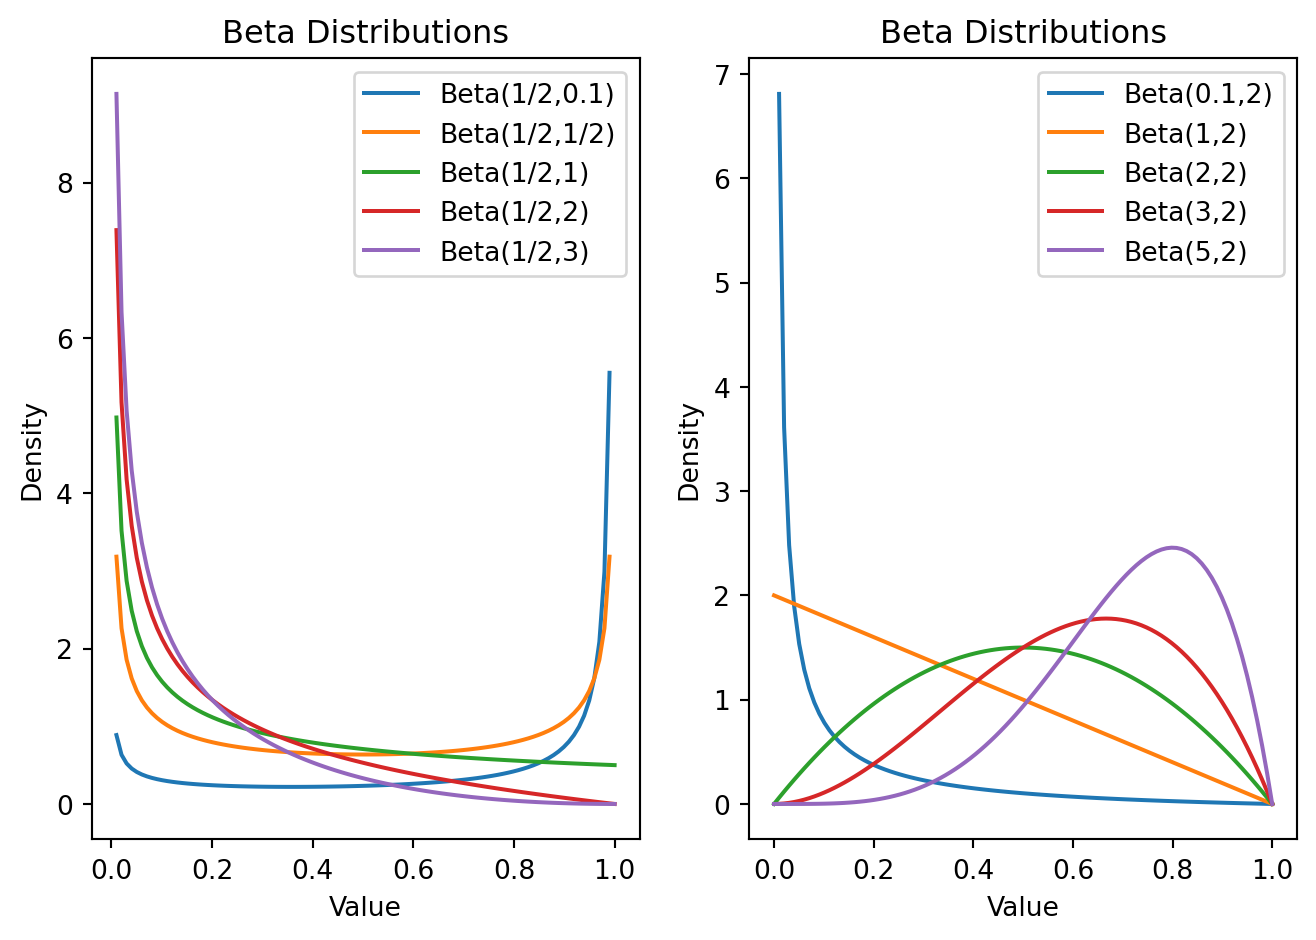

In [5]:
#| echo: false
#| fig-align: center
from scipy.stats import beta

# xの範囲を定義
x = np.linspace(0, 1, 100)

### 左側
plt.subplot(1, 2, 1)

pdf5 = beta.pdf(x, 0.5, 0.1)
plt.plot(x, pdf5, label='Beta(1/2,0.1)')

pdf1 = beta.pdf(x, 0.5, 0.5)
plt.plot(x, pdf1, label='Beta(1/2,1/2)')

pdf2 = beta.pdf(x, 0.5, 1)
plt.plot(x, pdf2, label='Beta(1/2,1)')

pdf3 = beta.pdf(x, 0.5, 2)
plt.plot(x, pdf3, label='Beta(1/2,2)')

pdf4 = beta.pdf(x, 0.5, 3)
plt.plot(x, pdf4, label='Beta(1/2,3)')

plt.title('Beta Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

### 右側
plt.subplot(1, 2, 2)

pdf1 = beta.pdf(x, 0.1, 2)
plt.plot(x, pdf1, label='Beta(0.1,2)')

pdf2 = beta.pdf(x, 1, 2)
plt.plot(x, pdf2, label='Beta(1,2)')

pdf3 = beta.pdf(x, 2, 2)
plt.plot(x, pdf3, label='Beta(2,2)')

pdf4 = beta.pdf(x, 3, 2)
plt.plot(x, pdf4, label='Beta(3,2)')

pdf5 = beta.pdf(x, 5, 2)
plt.plot(x, pdf5, label='Beta(5,2)')

plt.title('Beta Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# プロットのカスタマイズ
plt.tight_layout()
plt.show()